------

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Цель данного проекта состоит в изучении эффективности вложений в рекламную компанию развлекательного приложения. Нобходимо выполнить следующие шаги:
- загрузить данные и провести предобработку данных, проверить на пропуски, дубликаты, соответствуют ли типы данных столбцов хранящимся там данным;
- провести исследовательский анализ данных: откуда приходят пользователи и какими устройствами они пользуются, сколько стоит привлечение пользователей из различных рекламных каналов, сколько денег приносит каждый клиент, когда расходы на привлечение клиента окупаются;
- сделать выводы по результатам работы и дать рекомендации рекламному отделу.

### Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

In [2]:
visits, orders, costs = (
                    pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv'),
                    pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv'),
                    pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')
                        )

Для начала ознакомимся с каждым из датасетов, как выглядат данные и общую информацию (какие данные храняться, сколько строк)

In [3]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Стоит изменить стиль написания названий столбцов - привести к нижнему регистру и пробелы заменить на нижнее подчеркивание.
Также необходимо изменить тип данных, в которых указаны даты на 'datetime'

In [9]:
visits.columns = [x.lower().replace(' ','_') for x in visits.columns]

In [10]:
orders.columns = [x.lower().replace(' ','_') for x in orders.columns]

In [11]:
costs.columns = [x.lower() for x in costs.columns]

In [12]:
visits['session_start'] = pd.to_datetime(visits['session_start'])

In [13]:
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [14]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [15]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [16]:
display(visits.info())
display(orders.info())
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Далее проверим данные на наличие пропусков и простых дубликатов.

In [17]:
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [18]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [19]:
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

In [20]:
visits.duplicated().sum()

0

In [21]:
orders.duplicated().sum()

0

In [22]:
costs.duplicated().sum()

0

Пропуски и дубликаты в данных не обнаружены. После проведенной предобработки даных проведем исследовательский анализ данных. Перед этим зададим функции, необходимые для анализа.

### Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Вункции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Функция для создания пользовательских профилей

In [23]:
def get_profiles(sessions, orders, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функция для подсчёта Retention Rate

In [24]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Функция для расчета конверсии

In [25]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Функция для расчета LTV и ROI

In [26]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### функция для сглаживания данных

In [27]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### Функция для построения графика Retention Rate

In [28]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')



  
    
    plt.tight_layout()
    plt.show() 

#### Функция для построения графика конверсии

In [29]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### функция для визуализации LTV и ROI

In [30]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Выясним какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

#### Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [31]:
profiles = get_profiles(visits, orders, costs)

In [32]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [33]:
min_date_involved = profiles['dt'].min()

In [34]:
min_date_involved

datetime.date(2019, 5, 1)

In [35]:
max_date_involved = profiles['dt'].max()

In [36]:
max_date_involved

datetime.date(2019, 10, 27)

Из полученной таблицы видим даты первого посещения приложения пользователем, источник перехода, страна и устройство. Также определены пользователи платящие и нет, месяц привлечения пользователя и затраты на рекламу, для привлечения этого пользоваеля. Период анализа - с 1 мая 2019 года по 27 октября 2019 года. 

#### Определим, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

In [37]:
country_users = profiles.groupby('region').agg({'user_id':'nunique', 'payer':['sum', 'mean']})

In [38]:
country_users.columns=['Общее кол-во пользователей','Кол-во платящих пользователей','Доля платящих пользователей, %']

In [39]:
country_users['Доля платящих пользователей, %'] = round(country_users['Доля платящих пользователей, %']*100,2)

In [40]:
country_users.sort_values(by='Кол-во платящих пользователей', ascending=False)

,Общее кол-во пользователей,Кол-во платящих пользователей,"Доля платящих пользователей, %"
region,,,
United States,100002,6902,6.90
UK,17575,700,3.98
France,17450,663,3.80
Germany,14981,616,4.11


В приложение приходят пользователи из четырех стран - Соединенных штатов, Соединенного королевства, Франции и Германии. Лидером, как по общему количеству пользователей, так и по количеству платящих пользователей, являются Соединенные штаты. Внимание стоит обратить на Германию - не смотря на то, что общему количеству пользователей и количеству платящих пользователей, страна на четвертом месте в списке, по доле платящих пользователей от общего числа, страна на втором месте после соединенных штатов.

#### Определим, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

In [41]:
device_users = profiles.groupby('device').agg({'user_id':'nunique', 'payer':['sum', 'mean']})

In [42]:
device_users.columns=['Общее кол-во пользователей','Кол-во платящих пользователей','Доля платящих пользователей, %']

In [43]:
device_users['Доля платящих пользователей, %'] = round(device_users['Доля платящих пользователей, %']*100,2)

In [44]:
device_users.sort_values(by='Кол-во платящих пользователей', ascending=False)

,Общее кол-во пользователей,Кол-во платящих пользователей,"Доля платящих пользователей, %"
device,,,
iPhone,54479,3382,6.21
Android,35032,2050,5.85
Mac,30042,1912,6.36
PC,30455,1537,5.05


Что касается устройств пользователей, лидером  по всем параметрам является iPhone. Также стоит отметить Mac - доля платящих пользователей от общего количества с этого устройства на втором месте. Хотя Android на втором месте в количественном плане, доля  платящих от общего числа пользователей все-таки ниже, чем у пользователей Mac.

#### Определим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей.

In [45]:
channel_users = profiles.groupby('channel').agg({'user_id':'nunique', 'payer':['sum', 'mean']})

In [46]:
channel_users.columns=['Общее кол-во пользователей','Кол-во платящих пользователей','Доля платящих пользователей, %']

In [47]:
channel_users['Доля платящих пользователей, %'] = round(channel_users['Доля платящих пользователей, %']*100,2)

In [48]:
channel_users.sort_values(by='Общее кол-во пользователей', ascending=False)

,Общее кол-во пользователей,Кол-во платящих пользователей,"Доля платящих пользователей, %"
channel,,,
organic,56439,1160,2.06
FaceBoom,29144,3557,12.20
TipTop,19561,1878,9.60
OppleCreativeMedia,8605,233,2.71
LeapBob,8553,262,3.06
WahooNetBanner,8553,453,5.30
RocketSuperAds,4448,352,7.91
MediaTornado,4364,156,3.57
YRabbit,4312,165,3.83


In [49]:
channel_users.sort_values(by='Кол-во платящих пользователей', ascending=False)

,Общее кол-во пользователей,Кол-во платящих пользователей,"Доля платящих пользователей, %"
channel,,,
FaceBoom,29144,3557,12.20
TipTop,19561,1878,9.60
organic,56439,1160,2.06
WahooNetBanner,8553,453,5.30
AdNonSense,3880,440,11.34
RocketSuperAds,4448,352,7.91
LeapBob,8553,262,3.06
OppleCreativeMedia,8605,233,2.71
lambdaMediaAds,2149,225,10.47


In [50]:
channel_users.sort_values(by='Доля платящих пользователей, %', ascending=False)

,Общее кол-во пользователей,Кол-во платящих пользователей,"Доля платящих пользователей, %"
channel,,,
FaceBoom,29144,3557,12.20
AdNonSense,3880,440,11.34
lambdaMediaAds,2149,225,10.47
TipTop,19561,1878,9.60
RocketSuperAds,4448,352,7.91
WahooNetBanner,8553,453,5.30
YRabbit,4312,165,3.83
MediaTornado,4364,156,3.57
LeapBob,8553,262,3.06


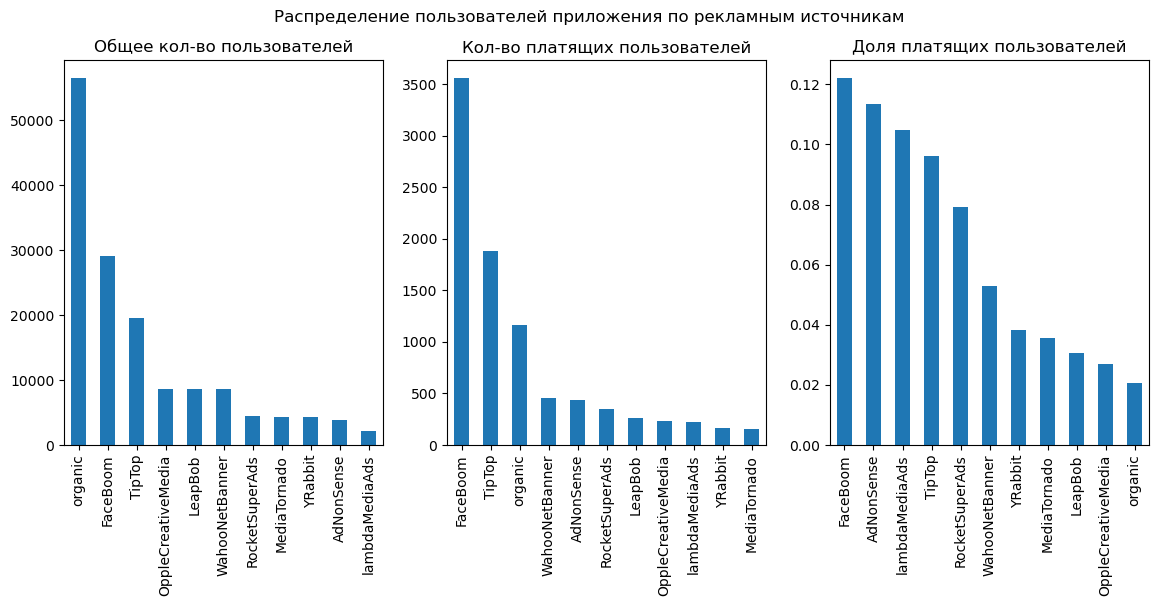

In [51]:
fig, axs = plt.subplots(nrows=1 , ncols=3, figsize=(14,5))
fig.suptitle('Распределение пользователей приложения по рекламным источникам')

profiles.groupby('channel')['user_id'].nunique().sort_values(ascending=False).plot(kind='bar', xlabel="", ax=axs[0])
axs[0].set(title='Общее кол-во пользователей')

profiles.groupby('channel')['payer'].sum().sort_values(ascending=False).plot(kind='bar', xlabel="", ax=axs[1])
axs[1].set(title='Кол-во платящих пользователей')

profiles.groupby('channel')['payer'].mean().sort_values(ascending=False).plot(kind='bar', xlabel="", ax=axs[2])
axs[2].set(title='Доля платящих пользователей');

Анализ рекламных источников привлечения пользователей показывает нам лидера по всем трем параметрам - FaceBoom. Канал TipTop находится на втором месте в количественном плане, но если смотреть на долю платящих к общему количеству, канал только на четвертом месте. Стоит обратить внимание на канал lambdaMediaAds - он замыкает перечень каналов по общему количеству пользователей, но если смотреть долю платящих относительно общего количества, то канал находится на третьем месте. Что касается пользователей, не пришедших с какого-либо рекламного канала, то по общему количеству такие пользователи в лидерах, но при этом доля платящих из них - ниже всех рекламных источников.

### Маркетинг

- Выясним общую сумму расходов на маркетинг.
- Узнаем, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.
- Узнаеме, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [52]:
costs

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


#### Общая сумма расходов на маркетинг.

In [53]:
costs['costs'].sum()

105497.30000000002

#### Расходы на каждый рекламный источник.

In [54]:
spent = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)

In [55]:
spent

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


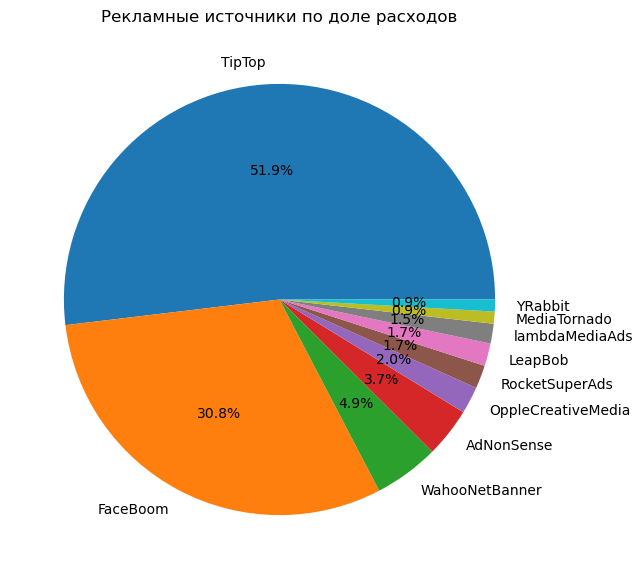

In [56]:
spent.plot(kind='pie',autopct='%.1f%%', ylabel="", legend='', subplots=True, figsize=(7, 7))
plt.title("Рекламные источники по доле расходов");

Общие расходы на рекламу составили 105497.3 у.е. Если взглянуть на распределение рекламных расходов по источникам, то видим, что более половины потрачено на TipTop, треть расходов на FaceBoom. Оставшиеся 8 рекламных источников забрали менее 30% общих расходов.

#### Строим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

In [57]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [58]:
costs['week'] = costs['dt'].dt.isocalendar().week

In [59]:
costs['month'] = costs['dt'].dt.month

In [60]:
costs_1 = costs.loc[(costs['channel'] != 'TipTop') & (costs['channel'] != 'FaceBoom')]

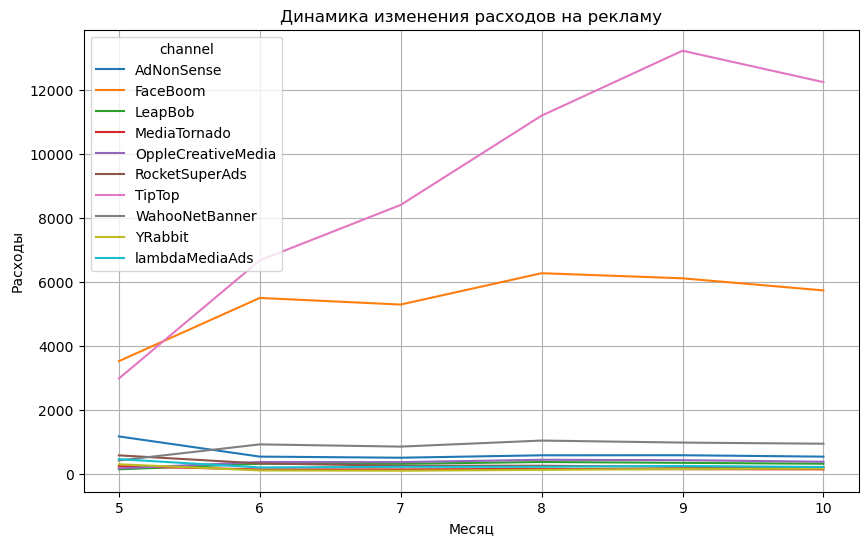

In [61]:
costs.pivot_table(
            index=['month'], columns='channel', values='costs', aggfunc='sum'
            ).plot(grid=True, figsize=(10,6))
plt.title('Динамика изменения расходов на рекламу')
plt.xlabel('Месяц')
plt.ylabel('Расходы');

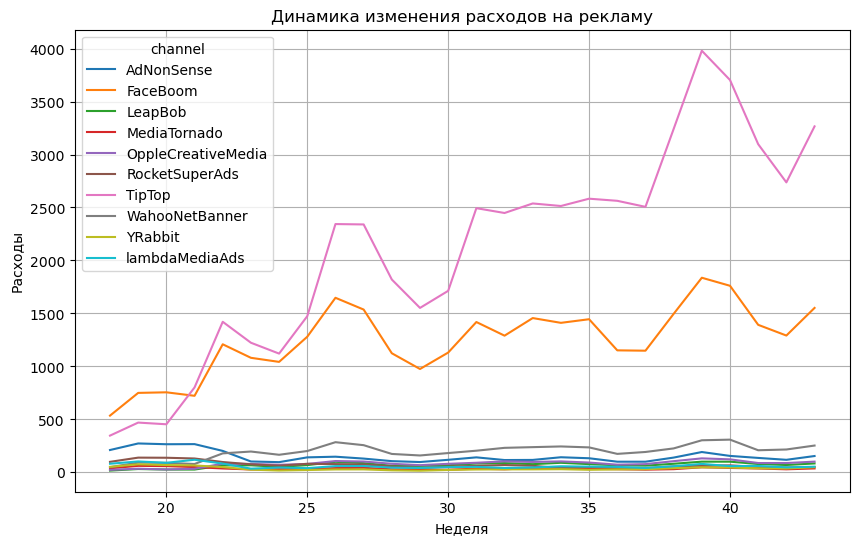

In [62]:
costs.pivot_table(
            index=['week'], columns='channel', values='costs', aggfunc='sum'
            ).plot(grid=True, figsize=(10,6))
plt.title('Динамика изменения расходов на рекламу')
plt.xlabel('Неделя')
plt.ylabel('Расходы');

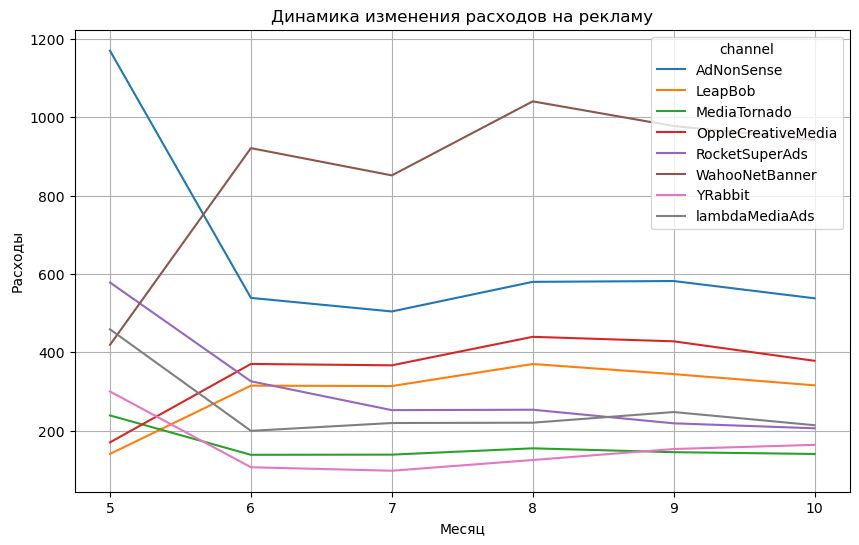

In [63]:
costs_1.pivot_table(
        index=['month'], columns='channel', values='costs', aggfunc='sum'
        ).plot(grid=True, figsize=(10,6))
plt.title('Динамика изменения расходов на рекламу')
plt.xlabel('Месяц')
plt.ylabel('Расходы');

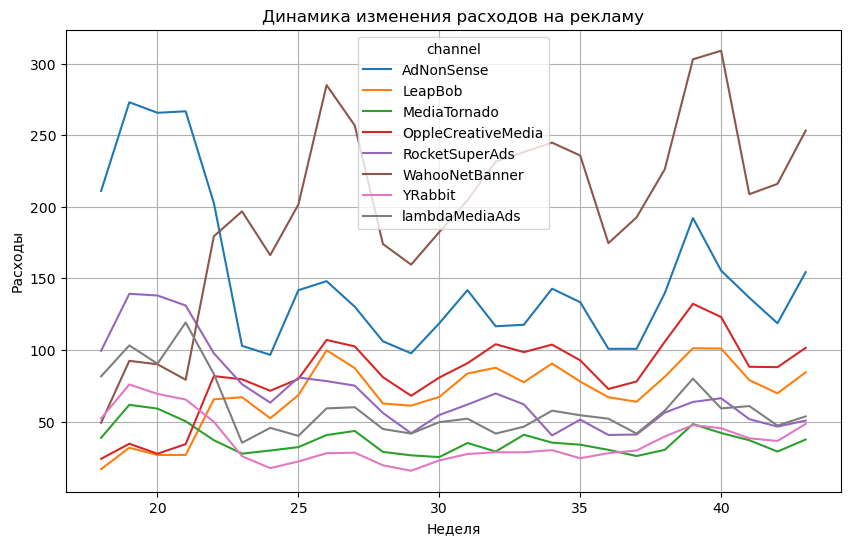

In [64]:
costs_1.pivot_table(
        index=['week'], columns='channel', values='costs', aggfunc='sum'
        ).plot(grid=True, figsize=(10,6))
plt.title('Динамика изменения расходов на рекламу')
plt.xlabel('Неделя')
plt.ylabel('Расходы');

По расходам на рекламу однозначным лидером является канал TipTop, причем рекламные расходы на этот канал только растут со временем. Рекламные расходы на FaceBoom также растет, но не так значительно. В остальных восьми каналах можно выделить WahooNetBanner, рекламные расходы на который также выросли в сравнении с началом.

#### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [65]:
profiles.groupby('channel').agg({'acquisition_cost':'mean'}).\
    rename(columns={'acquisition_cost':'CAC'}).sort_values(by='CAC', ascending=False)

,CAC
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


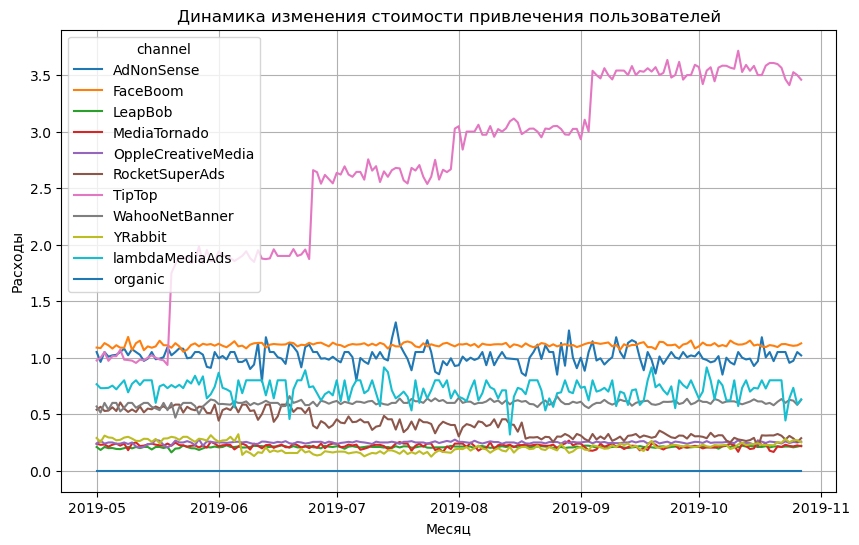

In [66]:
profiles.pivot_table(
            index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
            ).plot(grid=True, figsize=(10,6))
plt.title('Динамика изменения стоимости привлечения пользователей')
plt.xlabel('Месяц')
plt.ylabel('Расходы');

Расчитав среднюю стоимость привлечения одного пользователя, получили, что наибольшая стоимость из канала TipTop и составила в среднем 2.8 у.е, кроме этого на графике увеличение этой стоимости в 3,5 раза относительно начала периода исследования. Если смотреть на динамику изменения стоимости привлечения одного пользователя, можно обратить внимание на снижение из канала RocketSuperAds. По остальным каналам, в целом кардинальных изменений стоимости не наблюдается.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим графики конверсии и удержания.
- Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

#### Анализ окупаемости рекламы

In [67]:
profiles = profiles.query('channel != "organic"')

Органические пользователи исключены, поскольку для привлечения таких пользователей не были потрачены средства. Поэтому в анализе окупаемости рекламы эти данные могут привести к искажению результатов. 

In [68]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа

In [69]:
horizon_days = 14

In [70]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

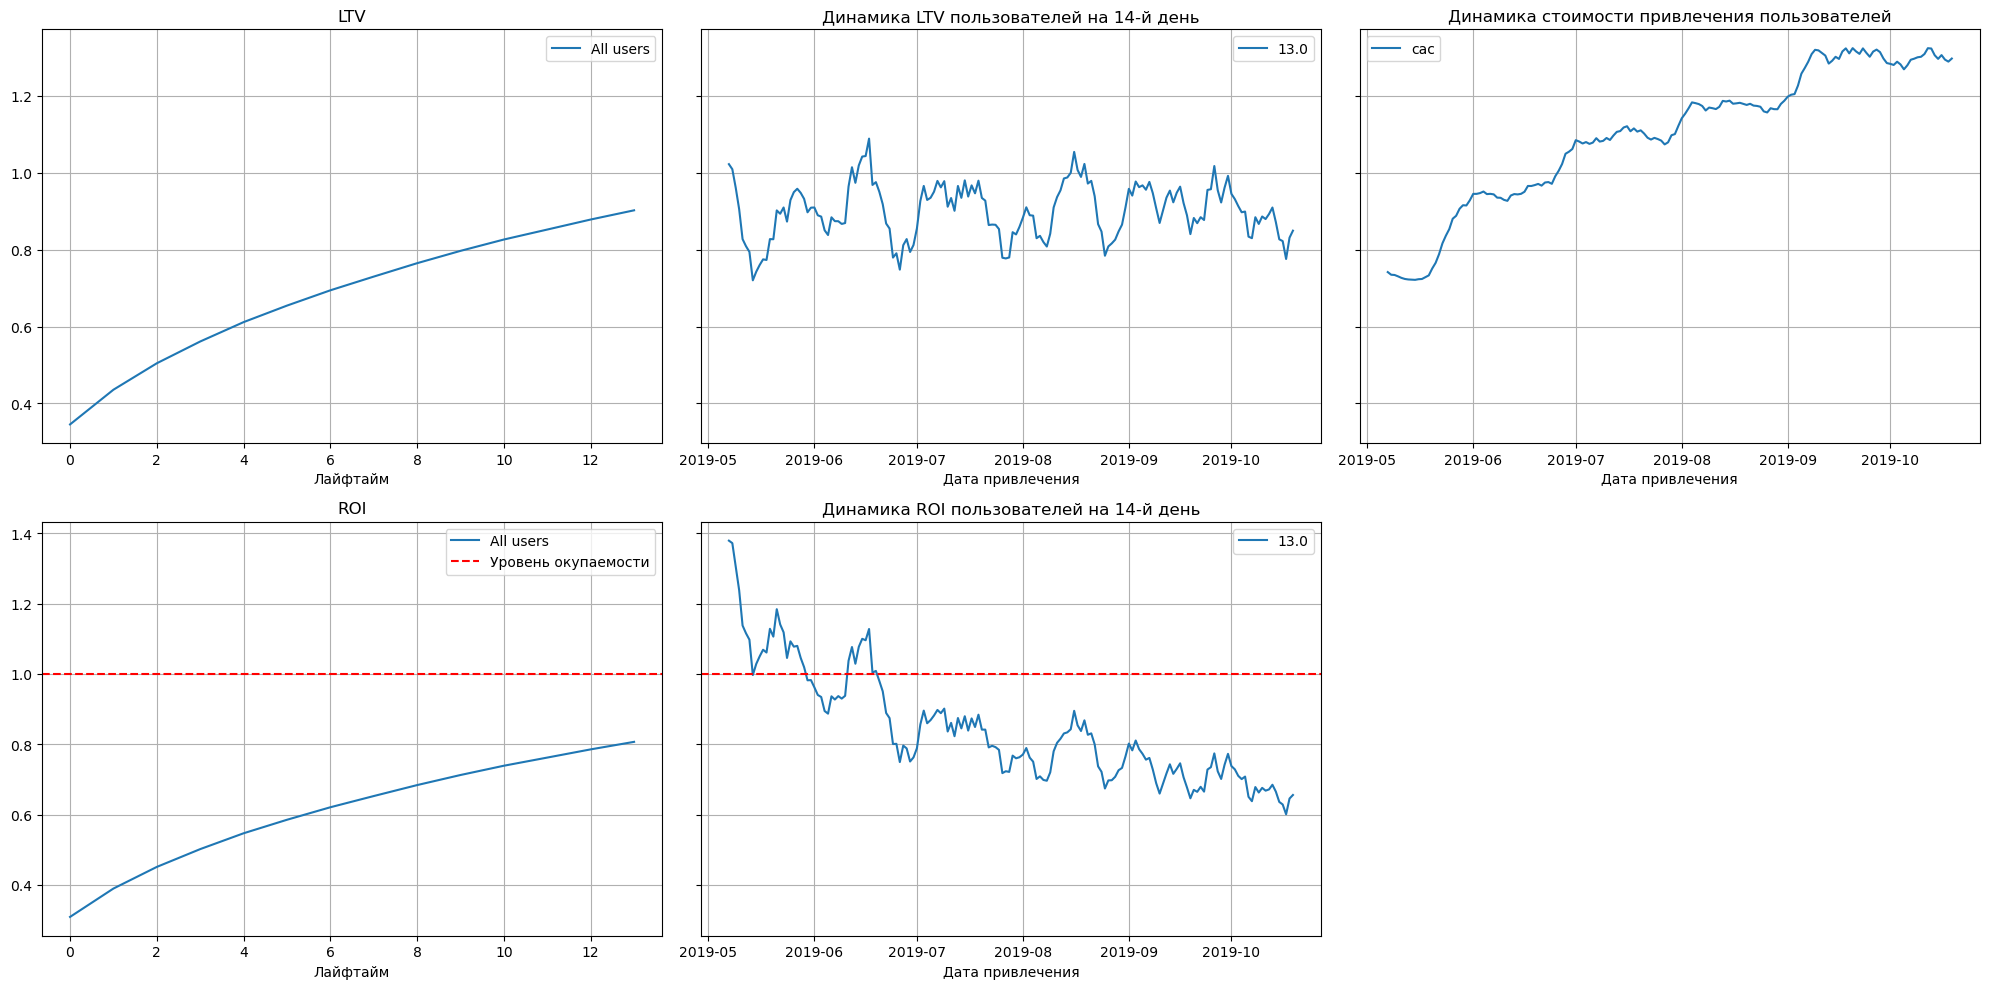

In [71]:
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Из полученных графиков видим:
- по LTV можно сказать, что этот показатель в целом стабилен, общей тенденции к увеличению или снижению нет;
- стоимость привлечения пользователей растет;
- ROI ниже порога окупаемости, т.е. затраты на рекламу не окупаются;
- показатель ROI в динамике снижается, и в июне опустился ниже порога окупаемости.

#### Конверсия пользователей и динамика её изменения.

In [72]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

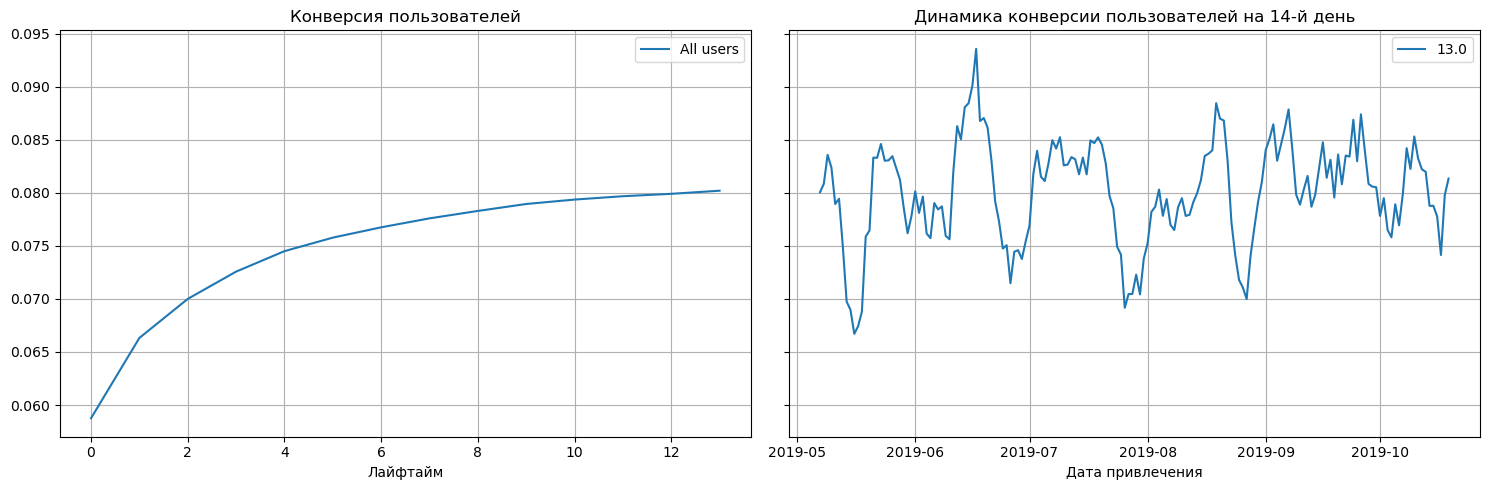

In [73]:
plot_conversion(conversion_grouped, conversion_history, horizon_days)

In [74]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
) 

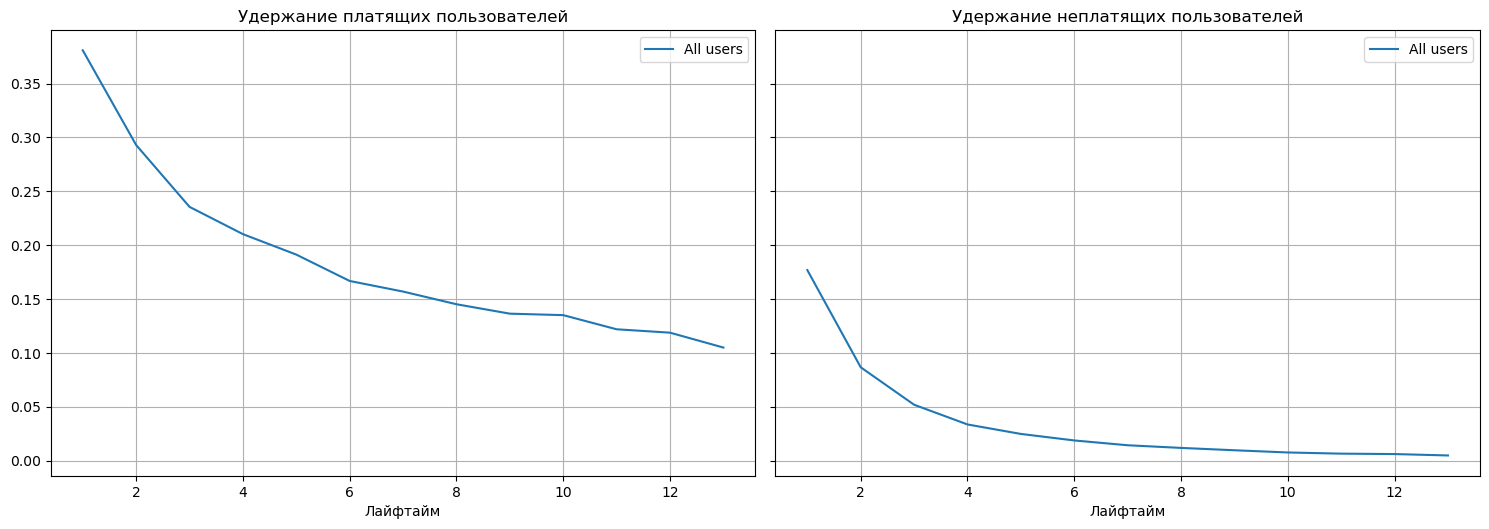

In [75]:
plot_retention(retention_grouped, retention_history, horizon_days)

По построенным графикам можно сказать, что полученные данные не противоречат теоретическим данным - коэффициент не снижается, удержание платящих превышает удержание не платящих. По динамике конврсии - можно сказать, что амплитуда изменений от минимальных значений к максимальным со временем уменьшается и концентрируется в районе значения 0.08, что совпадает с графиком конверсии пользователей. 

#### Анализ окупаемости рекламы с разбивкой по устройствам.

In [76]:
dimensions = ['device']

In [77]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions
)

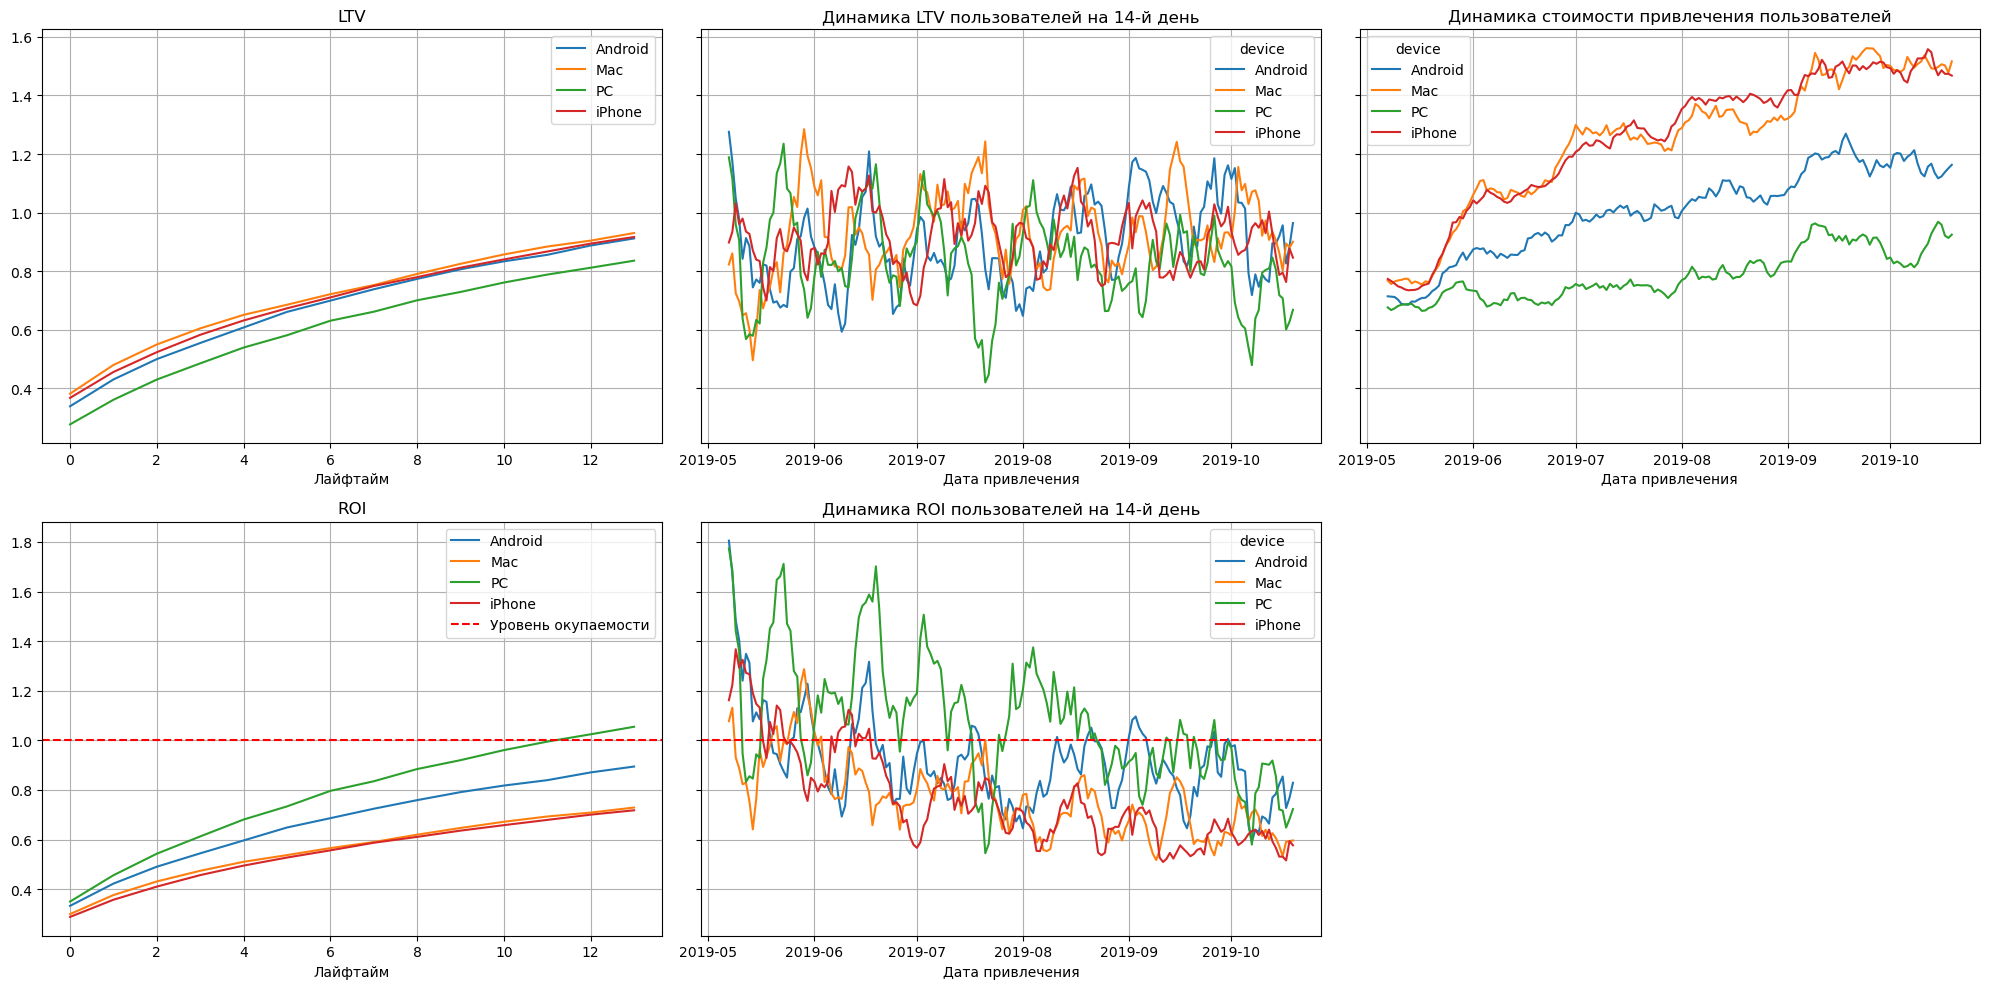

In [78]:
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Из графиков видим:
- стоимость привлечения пользователей растет для всех типов устройств, больше всего стоимость увеличичвается для Mac и iPhone;
- PC - единственная платформа, для которой ROI превысил порого окупаемости. Хуже всего в этом плане у  Mac и iPhone, инвестиции окупились лишь на 65%
- в динамике показатель окупаемости падает для всех устройств, хуже всего дела у Mac и iPhone

#### Анализ окупаемости рекламы с разбивкой по странам.

In [79]:
dimensions = ['region']

In [80]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions
)

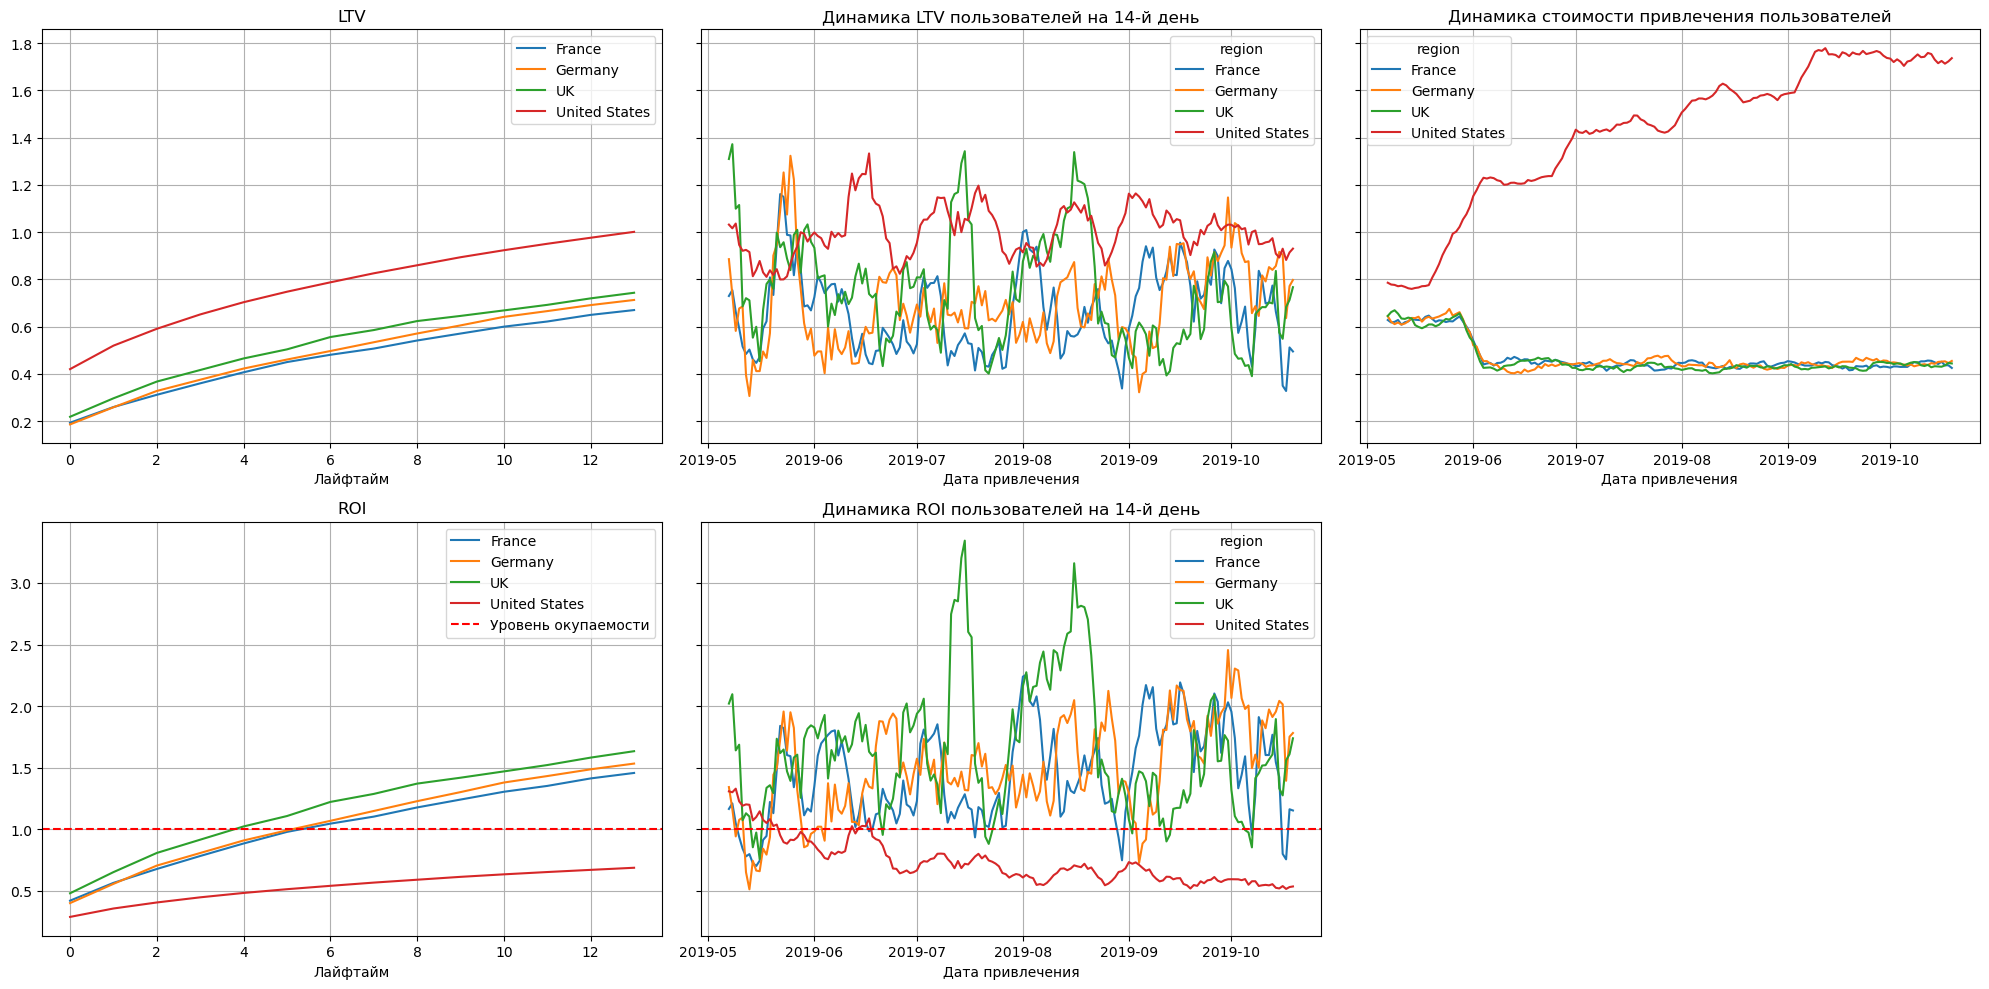

In [81]:
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Окупаемость рекламы с разбивкой по странам - хуже всего дела с пользователями из Соединенных Штатов, единственный регион, где ROI не превысил порого окупаемости и в динамике показывает тенденцию к сниэению этого показателя. Также обращает внимание большой рост стоимости привлечения пользователей из США, в то время как пользователи из других регионов показали снижение САС. 

#### Анализ окупаемости рекламы с разбивкой по рекламным каналам.

In [82]:
dimensions = ['channel']

In [83]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions
)

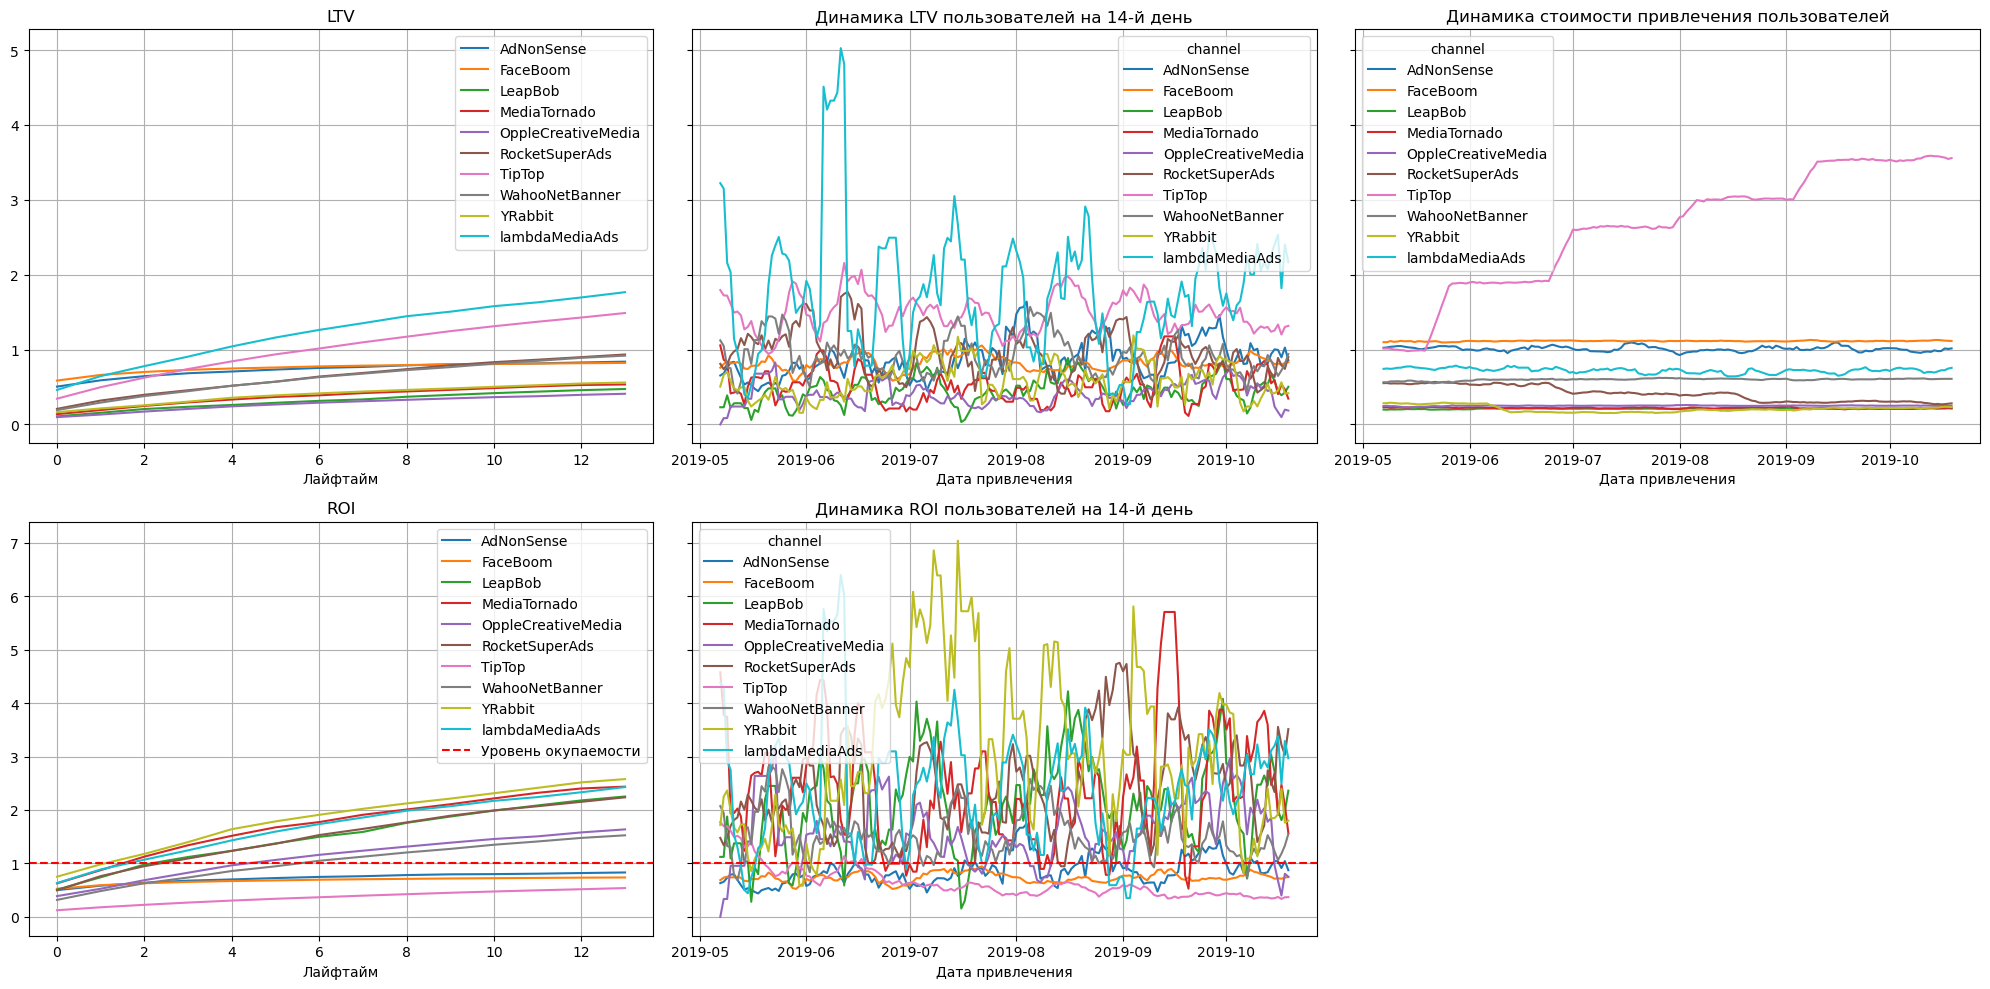

In [84]:
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Для платформы TipTop динамика стоимости привлечения пользователей показывает стабильный рост, но при этом такие инвестиции не оправдали себя - ROI ниже порога окупаемости. Здесь стоит обратить внимание на канал YRabbit - динамика стоимости привлечения пользователй на низком уровне, при этом показатель ROI больше, в сравнении с другими каналами, порог окупаемости превышен раньше всех рекламных каналов. С другой стороны обращает на себя внимание показатель LTV для канала YRabbit - он на довольно низком уровне, по сравнению с другими каналами. Т.е быструю окупаемость можно объяснить малыми вложениями, при этом будет ли расти LTV, если мы увеличим объем инвестиций в рекламу через этот канал - большой вопрос, требующий отдельного исследования.

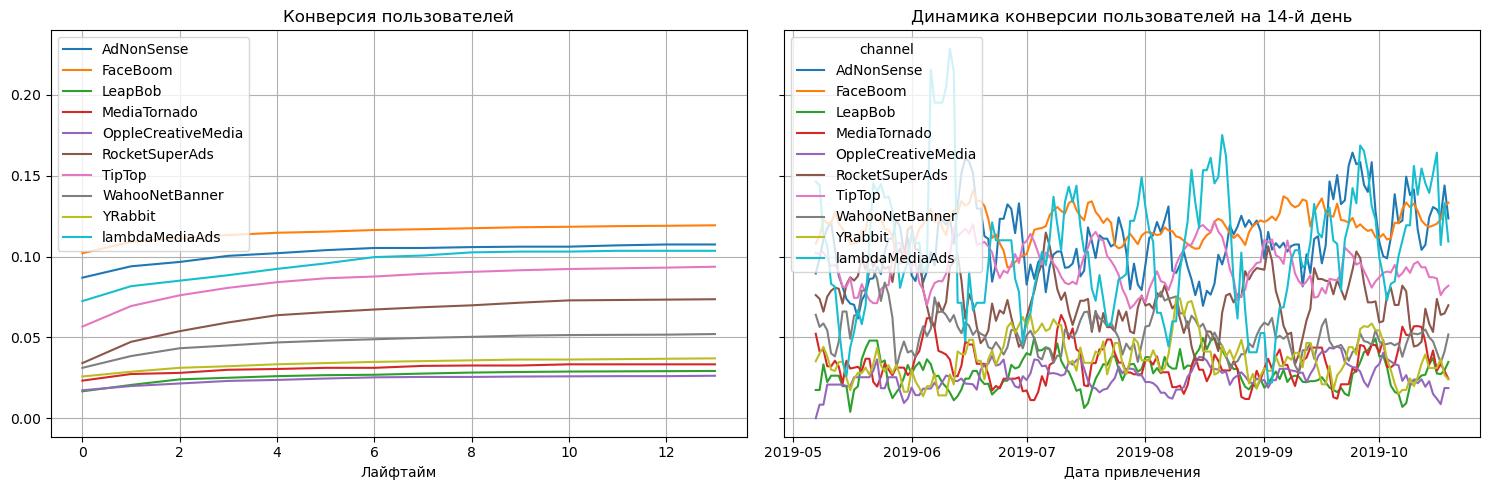

In [85]:
# конверсия с разбивкой по каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

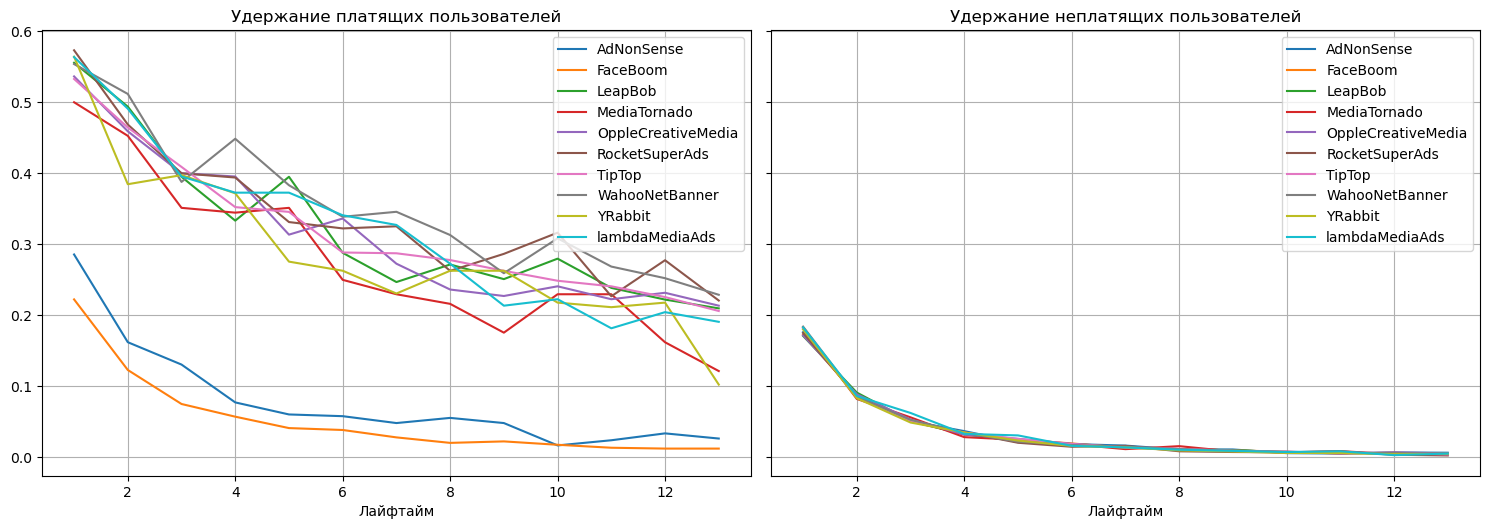

In [86]:
# удержание с разбивкой по каналам
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Построив графики конверсии и удержания пользователей можно увидеть противоречие канала FaceBoom - с одной стороны это канал с лучшей конверсией, при этом по удержанию пользователей этот канал худший.

### Вывод

В данном проекте проведен анализ пользователей приложения Procrastinate Pro+. Пользователи данного приложения из четырех стран - Соединенные Штаты, Соединенное Королевство, Германия и Франция, использующие устройства Iphone, Mac, Android, PC. По количеству пользователей среди стран лидируют Соединенные Штаты. iPhone лидирует среди устройств, используемых пользователями приложения. Среди рекламных источников, которые привлекли новых пользователей можно выделить канал FaceBoom - лидер по количеству общего числа пользователей, числа платящих пользователей и доли платящих пользователей относительно общего количества пользователей. Среди каналов привлечения новых пользователей обращает на себя TipTop - с самой большой стоимостью привлечения новых пользователей (2.8 у.е.), что превышает более чем в два раза идущий вторым канал FaceBoom (1.11 у.е.). При этом стоимость привлечения одного пользователя для канала TipTop росла регулярно (примерно каждый месяц) и это единственный канал, показавший такой рост. Помимо прочего, половина потраченных на рекламу денег (51.9%) ушло также на канал TipTop. Также среди каналов стоит выделить канал YRabbit с одной из самых низких цен привлечения новых пользователей (0.22 у.е.), долей расходов на рекламу 0.9% - показатель ROI превысил порог окупаемости раньше других каналов. При этом доля платящих пользователй составляет 3.82% и по этому показателю канал на седьмом месте из десяти.Рассматривая стоимость привлечения новых пользователей относительно стран и используемых устройств, получили, что самая высокая стоимость пользователей из США - это единственная страна из четырех, показавшая рост этого показателя и при этом также единственная, не перешагнувшая порог окупаемости. По устройствам - самая большая стоимость привлечения любителей техники Apple. Единственной платформой, пользователи которой превзошли порог окупаемости вложенных инвестиций - PC. При этом стоимость привлечения новых пользователей устройств РС самая низкая. В то же время стоит отметить, что доля платящих пользователей РС самая низкая среди всех устройств. По показателю LTV - стабильные значения по всем исследуемым параметрам (устройства, страны, каналы привлечения пользователей), в динамике можно заметить преиодическое снижение и увеличение этого показателя в разные периоды времени, но вцелом данный показатель достаточно стабилен. Т.е. можно сказать, что снижение "качества" пользователей не происходит. В общем и целом стоит отметить дисбаланс рекламной кампании в сторону определенных устройств, стран, каналов. Из десяти каналов, более половины идет на один канал, восемь же каналов потребляют менее 30% рекламных расходов. При этом ни один из параметров, на который сделан акцент, не показал притока выручки и вовсе не смог перешагнуть порог окупаемости

#### Рекомендации для рекламного отдела

В первую очередь стоит поработать с пользователями с наибольшей стоимостью привлечения: страна - США, используемые устройства - iPhone и Mac. Да, большая часть пользователей из США. Также большая часть пользователей приложения используют iPhone и Mac, но при этом ROI для этих параметров не превысил порог окупаемости. Стоит сбалансировать рекламный бюджет относительно различных стран, устройств и рекламных источников. Так среди стран, стоит обратить внимание на Германию, находящуюся на втором месте после США по доле платящих пользователей относительно их общего количества. Также стоит сбалансировать рекламные расходы относительно каналов привлечения новых пользователей. Вложения в TipTop себя не оправдали и не окупились. Уже был упомянут YRabbit, также можно отметить lambdaMediaAds, с высокой долей платящих пользователей и также превысившей порог окупаемости. Можно уменьшить рекламный бюджет TipTop и направить эти средства на эти два канала и посмотреть в динамике как будет меняться окупаемость этих затрат.

Стоит поработать над удержанием пользователей, пришедших с канала FaceBoom. Это канал с лучшей конверсией среди всех каналов, при этом удержание на крайне малом уровне. Возможно реклама на данном канале недостаточно информативна и не показывает всех преимуществ приложения и пользователи "отваливаются" недостаточно хорошо узнав приложение. Возможно стоит провести опрос через соцсети или e-mail, почему пользователи больше не используют приложение. Также можно настроить более таргетированное привлечение, направленное на пользователей с необходимыми характеристиками или ввести поощрение пользователей за репосты контента и прочий социальный engagement, связанный с приложением, в данном канале. Кроме этого, поскольку у нас развлекательное приложение, возможно стоит изучить тренды области развлечений США, поскольку из этой страны наибольшее число пользователей - приложение не соответствует ожиданиям и интересам жителей США. Чтобы повысить удержание пользователей из США, можно, к примеру,  ведения персонализированных UX-стратегий, e-mail рассылок, персональных рекомендаций, push-уведомлений. Можно ввести определённые "награды" или привилегии для постоянных пользователей. Также стоит обратить внимание, что наибольшее число пользователей используют iPhone - возможно есть какие-то проблемы в работе приложения c устройствами Apple и стоит внести какие-либо изменения.